# MNIST classification

The MNIST database of grayscale handwritten digits, available from this page http://yann.lecun.com/exdb/mnist/, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data.

## Import Libraries

In [125]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## The MNIST Dataset

In [126]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

In [127]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [128]:
print(mnist['DESCR'])

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

**Digit images are stored as 784-D vectors**. Each component represents the grayscale value of a pixel.

In [129]:
data = mnist['data']
target = mnist['target']

### Visualize MNIST image
We'll visutalize the **1st** sample image in the dataset. First reshape it into a 28-by-28 matrix array

In [130]:
img = data[0].reshape(28,28)
print(img.shape)

(28, 28)


Print out the label (or digit) of the chosen image

In [131]:
print(target[0])

5


Show the image using **imshow()** with the aurgments **cmap = plt.cm.gray, interpolation='nearest', clim=(0, 255)**

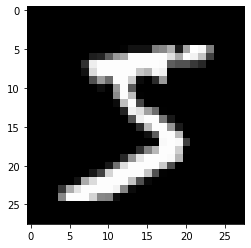

In [132]:
plt.figure(figsize=(8,4));
# use imshow below
plt.imshow(img, cmap= plt.cm.gray, interpolation='nearest', clim=(0, 255))

## Logistic Regression on MNIST

Splitting original dataset into 10000 samples for testing and 60000 for training, set **random_state=101**

In [133]:
from sklearn.model_selection import train_test_split

In [134]:
X_train, X_test, y_train, y_test = train_test_split(data,target,test_size=0.142857,random_state=101)
print(X_train.shape)

(60000, 784)


### Training

Build a logistic regression model using default settings

In [135]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)

Fit the logistic regression model on training data and print out the running time for training process. It'll take a long time. Ignore the warnings. 

In [136]:
import time
start = time.time()
classifier.fit(X_train, y_train)
print("Total time: ", time.time() - start, "seconds")

Total time:  12.373753547668457 seconds


C:\Users\sreed\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### Testing

Make predictions on test data and print out the classification report

In [137]:
from sklearn.metrics import classification_report
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1008
           1       0.96      0.97      0.97      1097
           2       0.92      0.90      0.91       989
           3       0.89      0.89      0.89      1046
           4       0.94      0.92      0.93       960
           5       0.90      0.86      0.88       913
           6       0.93      0.95      0.94      1005
           7       0.93      0.93      0.93      1068
           8       0.88      0.89      0.89       940
           9       0.88      0.91      0.90       974

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



## Dimensional reduction by PCA 

In [138]:
from sklearn.decomposition import PCA

Keep 100 principal components of the data (stored in vector form)

In [139]:
pca = PCA(copy=True, iterated_power='auto', n_components=100, random_state=None,svd_solver='auto', tol=0.0, whiten=False)

Transform MNIST data to its first 100 principal components using **transform()**

In [140]:
principalComponents = pca.fit_transform(data)

Print out the dimension of data array after PCA

In [141]:
print(principalComponents.shape)

(70000, 100)


### Visualize the processed image

You need to first transform the PCA data back to the original coordinate system under standard basis. Simply use the attribute **inverse_transform()** for this 

In [142]:
X_trans = pca.inverse_transform(principalComponents)

Plot the orignal image and processed image (by PCA) side by side

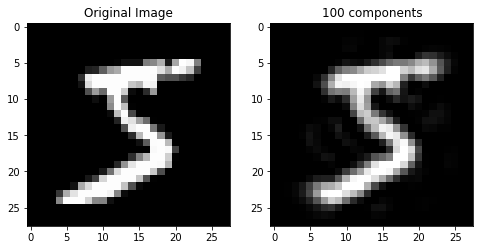

In [143]:
plt.figure(figsize=(8,4));

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(img, cmap= plt.cm.gray, interpolation='nearest', clim=(0, 255))
plt.title("Original Image")

# 100 principal components
plt.subplot(1, 2, 2)
img1=(X_trans[0].reshape(28,28))
plt.imshow(img1, cmap= plt.cm.gray, interpolation='nearest', clim=(0, 255))
plt.title("100 components")
plt.show()

## Logistic Regression with PCA

Splitting processed PCA data into 10000 samples for testing and 60000 for training, set **random_state=101**

In [144]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_trans,target,test_size=0.142857,random_state=101)

### Training 

Fit the logistic regression model on PCA data and print out the training time. Ignore the warnings.

In [145]:
start = time.time()
classifier.fit(X_train1, y_train1)
print("Total time: ", time.time() - start, "seconds")

Total time:  12.445045948028564 seconds


C:\Users\sreed\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


As we can see, dimensional reduction via PCA dramatically speeds up the training.

### Testing

Make predictions on test data and print out the classification report

In [146]:
y_pred1 = classifier.predict(X_test1)
print(classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1008
           1       0.95      0.97      0.96      1097
           2       0.92      0.89      0.90       989
           3       0.90      0.89      0.89      1046
           4       0.93      0.93      0.93       960
           5       0.89      0.86      0.87       913
           6       0.93      0.96      0.94      1005
           7       0.93      0.93      0.93      1068
           8       0.90      0.89      0.90       940
           9       0.89      0.91      0.90       974

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

